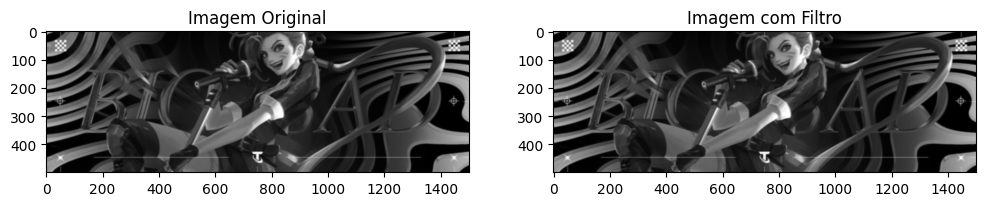

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_filter(image, filter_matrix):
    M, N = image.size
    K = len(filter_matrix[0]) // 2
    L = len(filter_matrix) // 2

    s = 1.0 / np.sum(filter_matrix)  # Normalizar os coeficientes do filtro
    copy = image.copy()

    for v in range(L, N - L - 1):
        for u in range(K, M - K - 1):
            total_sum = 0
            for j in range(-L, L + 1):
                for i in range(-K, K + 1):
                    p = copy.getpixel((u + i, v + j))
                    c = filter_matrix[j + L][i + K]
                    total_sum += c * p

            q = int(round(s * total_sum))
            q = 0 if q < 0 else 255 if q > 255 else q
            image.putpixel((u, v), q)

    return image

# Load the image
image_path = "imagem.jpg"
original_image = Image.open(image_path).convert("L")  # Convert to grayscale

# Define the filter matrix
filter_matrix = np.array([
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
])

# Apply the filter
result_image = apply_filter(original_image, filter_matrix)

# Save the result image
result_image.save("resultado.jpg")

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(original_image, cmap="gray")
ax1.set_title("Imagem Original")

ax2.imshow(result_image, cmap="gray")
ax2.set_title("Imagem com Filtro")

plt.show()
